# Experimental characterization of ANT Chip
---
August 2020

Nov. 2019 ANT Chip

Chirped CDCs and segmented micro-heaters

Jonathan Cauchon

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import qontrol
import time

In [105]:
# q = qontrol.QXOutput(serial_port_name = "COM1")
q = qontrol.QXOutput(serial_port_name="/dev/tty.usbserial-FT1PC5ZK")

In [106]:
print(q.n_chs)
print(q.v)
print(q.i)

24
[-0.0061, -0.0063, -0.0078, -0.0063, -0.0061, -0.0055, -0.0067, -0.0058, -0.0072, -0.0058, -0.0054, -0.0068, -0.0051, -0.0056, -0.0053, -0.0071, -0.0071, -0.0069, -0.0075, -0.0066, -0.0054, -0.0058, -0.0072, -0.0071]
[-0.0124, -0.0123, -0.0147, -0.0062, -0.0056, -0.0018, -0.008, -0.0126, -0.0041, -0.0124, -0.0086, -0.0072, -0.0062, -0.0042, -0.0095, -0.0094, -0.0076, -0.0013, 0.0025, 0.0013, -0.0061, 0.0001, -0.0038, -0.004]


In [23]:
""" Q8iv Specs
    voltage in V  - max 12 V
    Current in mA - max 24 mA
"""

# q.v[0] = 5
# q.v[:] = np.linspace(1,12,24).tolist()
q.v[:] = 0
print(q.v)

[-0.0035, -0.0035, -0.0044, -0.0025, -0.0031, -0.003, -0.0039, -0.0034, -0.0042, -0.0025, -0.0015, -0.0032, -0.0018, -0.0021, -0.0021, -0.0045, -0.005, -0.0039, -0.0047, -0.0034, -0.0031, -0.003, -0.0054, -0.0052]


In [114]:
q.close()

In [45]:
""" Qontrol-PCB pin conversion """
pins = ["B1", "T1", "T2", "B3", "T3", "T4", "T5", "B5", "T6", "T7", "B7", "T8", "T9", "B9", "T10", "T11", "T12"]

In [60]:
pin = 0

q.i[:] = 0
# q.v[pin] = 3
print(pin, pins[pin])

0 B1


In [107]:
def iv(pin, I_max=10, num_points=10, sleep_time=.1):
    q.i[:] = 0
    I = np.linspace(0, I_max, num_points).tolist()
    V = []
    for i in I:
        q.i[pin] = i
        time.sleep(sleep_time)
        V.append(q.v[pin])
        
    q.i[:] = 0
        
    return I, V
        
    
def iv_curves(pins, plot=True, saveas=None, **kwargs):
    I, V, R = [], [], []
    for pin in pins:
        i, v = iv(pin, **kwargs)
        r, _ = np.polyfit(np.asarray(i)*1e-3, v, 1)
        I.append(i)
        V.append(v)
        R.append(r)
        
    I, V = np.asarray(I), np.asarray(V)
    
    if saveas is not None:
        np.save(saveas, np.stack((I,V)))
        
    if plot:
        for pin in pins:
            plt.plot(I[pin,:], V[pin,:], "o-", label="pin " + str(pin) + ", R = " + str(np.round(R[pin],2)))
            plt.legend(bbox_to_anchor=(1.4, 1))
    
        
    return I, V, R

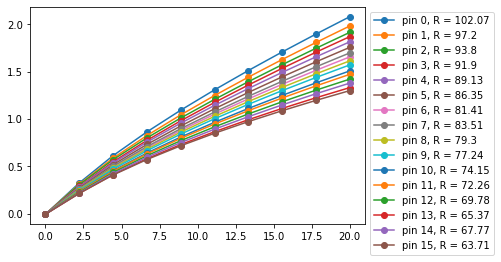

In [113]:
electrodes = np.arange(0,16)
# I, V, R = iv_curves(electrodes, saveas="IV_curves_08_25.npy___", I_max=20)

In [92]:
print(np.arange(0,16))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


-170.94709090909072


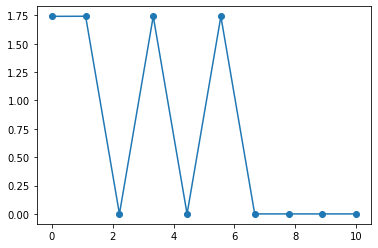

In [72]:
plt.plot(I,V, "o-")
R, _ = np.polyfit(np.asarray(I)*1e-3, V, 1)
print(R)

In [115]:
print(np.load("IV_curves_08_25.npy").shape)

(2, 16, 10)
